<a href="https://colab.research.google.com/github/daniruro19/Python/blob/main/zalando_ruizDaniel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import numpy as np

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
test_images.shape

(10000, 28, 28)

In [5]:
display(np.unique(train_labels))
display(np.unique(test_labels))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

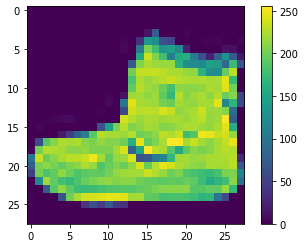

In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
train_images = train_images / 255.0
test_images = test_images / 255.0

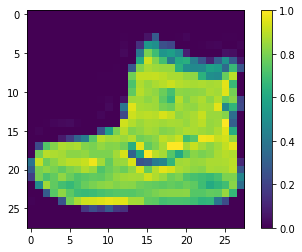

In [8]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

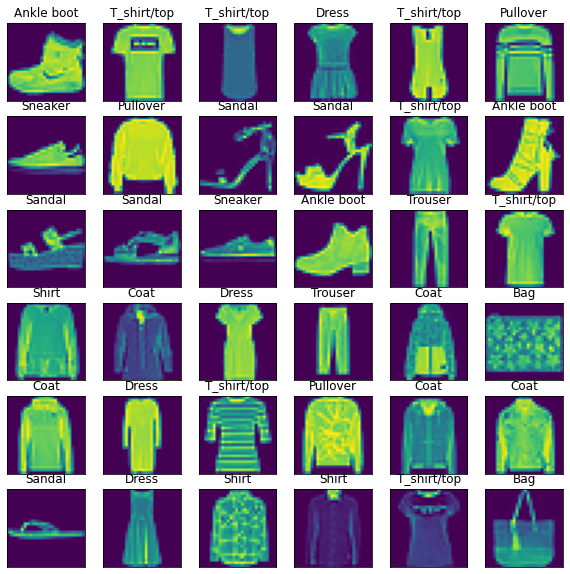

In [9]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape((28,28)))
    label_index = int(train_labels[i])
    plt.title(class_names[label_index])
plt.show()

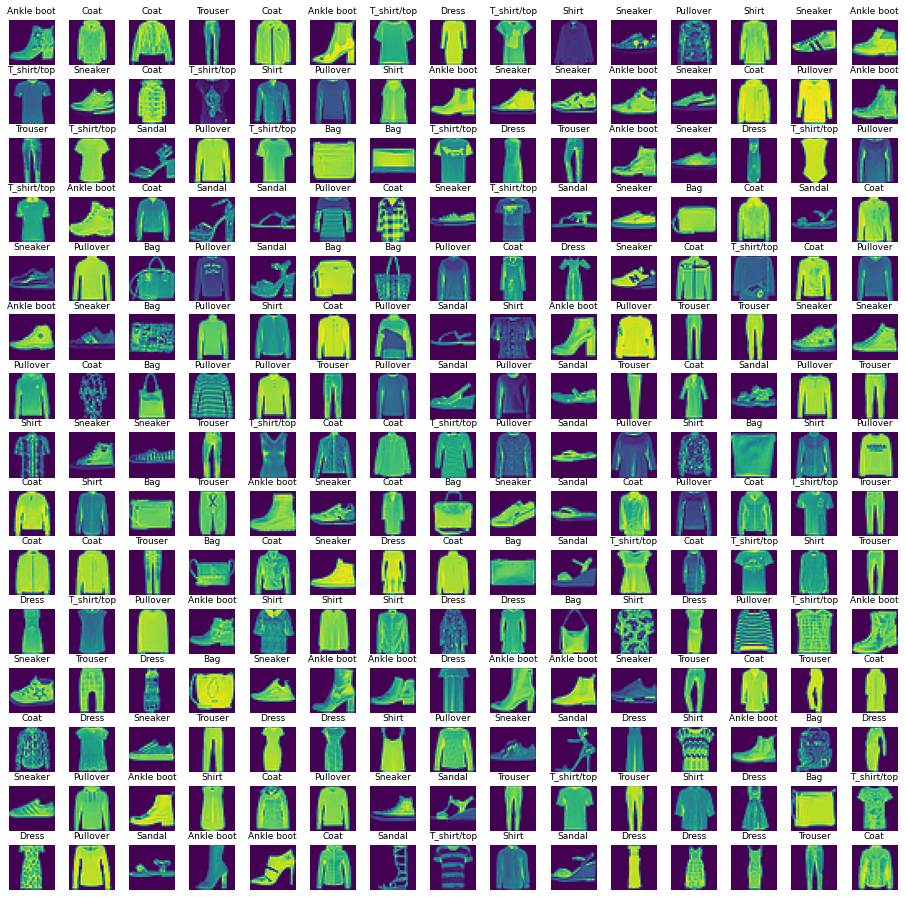

In [10]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (16,16))
axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array
n_train = len(train_images) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow( train_images[index].reshape((28,28)) )
    labelindex = int(train_labels[index])
    axes[i].set_title(class_names[labelindex], fontsize = 9)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.3)

# Neural network

In [11]:
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [12]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

In [14]:
# Crear modelo secuencial
model = Sequential([
  layers.Flatten(input_shape=(28, 28)),  # Convertir imagen en un vector unidimensional
  layers.Dense(128, activation='relu'), # Capa oculta con 128 neuronas
  layers.Dense(10)                      # Capa de salida con 10 neuronas correspondientes a las 10 clases de prendas
])

In [15]:
# Compilar modelo
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
# Entrenar modelo
history = model.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels))

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 3.2246 - accuracy: 0.6949 - val_loss: 0.8854 - val_accuracy: 0.6752
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7411 - accuracy: 0.7341 - val_loss: 0.7426 - val_accuracy: 0.7334
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6615 - accuracy: 0.7623 - val_loss: 0.6499 - val_accuracy: 0.7703
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6168 - accuracy: 0.7810 - val_loss: 0.5978 - val_accuracy: 0.7920
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5840 - accuracy: 0.7956 - val_loss: 0.5766 - val_accuracy: 0.8076
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5664 - accuracy: 0.8096 - val_loss: 0.6150 - val_accuracy: 0.8009
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5453 - accuracy: 0.8186 - val_loss: 0.5871 - val_accuracy:

In [17]:
# evaluate the keras model
loss,accuracy = model.evaluate(train_images, train_labels)
print('Accuracy: %.2f' % (accuracy*100))

1875/1875 [==============================] - 4s 2ms/step - loss: 0.4773 - accuracy: 0.8459
Accuracy: 84.59


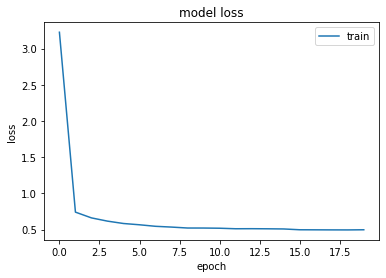

In [18]:
plt.plot(history.history["loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train"], loc="upper right")
plt.show()

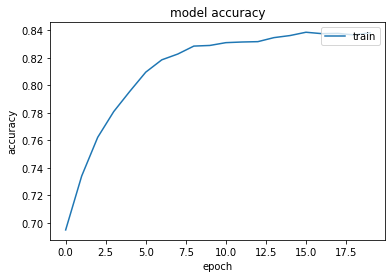

In [19]:
plt.plot(history.history["accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train"], loc="upper right")
plt.show()